<a href="https://colab.research.google.com/github/goktuggokmen/e-commerce-data-analysis-for-sales-strategy/blob/main/Uygulama_3_Satis_Stratejisi_Icin_E_ticaret_Veri_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Kullanılacak Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Bütün Aylara Ait Satış Verilerinin Dataframe'de Toplanması

In [ ]:
january = pd.read_csv('/content/Sales_January_2019.csv')
february = pd.read_csv('/content/Sales_February_2019.csv')
march = pd.read_csv('/content/Sales_March_2019.csv')
april = pd.read_csv('/content/Sales_April_2019.csv')
may = pd.read_csv('/content/Sales_May_2019.csv')
june = pd.read_csv('/content/Sales_June_2019.csv')
july = pd.read_csv('/content/Sales_July_2019.csv')
august = pd.read_csv('/content/Sales_August_2019.csv')
september = pd.read_csv('/content/Sales_September_2019.csv')
october = pd.read_csv('/content/Sales_October_2019.csv')
november = pd.read_csv('/content/Sales_November_2019.csv')
december = pd.read_csv('/content/Sales_December_2019.csv')

In [ ]:
month1 = pd.DataFrame(list(["january" for i in range(len(january))]))
month2 = pd.DataFrame(list(["february" for i in range(len(february))]))
month3 = pd.DataFrame(list(["march" for i in range(len(march))]))
month4 = pd.DataFrame(list(["april" for i in range(len(april))]))
month5 = pd.DataFrame(list(["may" for i in range(len(may))]))
month6 = pd.DataFrame(list(["june" for i in range(len(june))]))
month7 = pd.DataFrame(list(["july" for i in range(len(july))]))
month8 = pd.DataFrame(list(["august" for i in range(len(august))]))
month9 = pd.DataFrame(list(["september" for i in range(len(september))]))
month10 = pd.DataFrame(list(["october" for i in range(len(october))]))
month11 = pd.DataFrame(list(["november" for i in range(len(november))]))
month12= pd.DataFrame(list(["december" for i in range(len(december))]))

january['Month'] = month1
february['Month'] = month2
march['Month'] = month3
april['Month'] = month4
may['Month'] = month5
june['Month'] = month6
july['Month'] = month7
august['Month'] = month8
september['Month'] = month9
october['Month'] = month10
november['Month'] = month11
december['Month'] = month12

In [ ]:
data = pd.concat([january,february,march,april,may,june,july,august,september,october,november,december])
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",january
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",january
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",january
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",december
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",december
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",december
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",december


# 3. Null İçeren Verilerin Veri Setinden Çıkarılması 

In [ ]:
data.dropna(subset = ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address'], axis = 0, inplace = True)
data.reset_index()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",january
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",january
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",january
...,...,...,...,...,...,...,...,...
186300,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",december
186301,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",december
186302,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",december
186303,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",december


# 4. İş problemleri

**a. En iyi satış yapılan ay hangisidir? Ne kadar kazanılmıştır?**

In [ ]:
data = data[data['Quantity Ordered'] != 'Quantity Ordered']
data['Price Each'] = data['Price Each'].astype('float')
data['Quantity Ordered'] = data['Quantity Ordered'].astype('float')
all_months = data.groupby(['Month'])['Price Each'].sum().sort_values(ascending = False)
all_months = all_months.to_frame()
all_months['Month'] = all_months.index
all_months

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Price Each,Month
Month,,
december,4.594119e+06,december
october,3.715703e+06,october
april,3.373059e+06,april
november,3.179905e+06,november
may,3.127097e+06,may
march,2.793172e+06,march
july,2.631687e+06,july
june,2.562497e+06,june
august,2.230297e+06,august


Text(0.5, 1.0, 'Aylara Gore Satis Verileri')

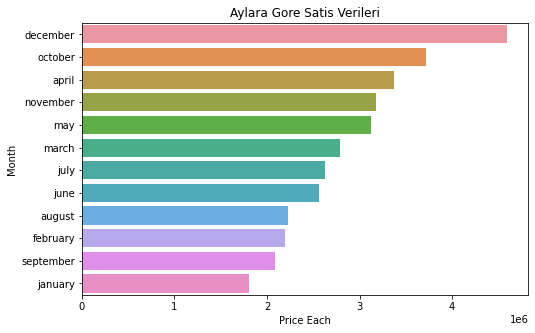

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Price Each',y ='Month',data = all_months)
plt.title('Aylara Gore Satis Verileri')

**b. En çok satın alma yapan şehir hangisidir?**

In [ ]:
list_city = []
for address in data['Purchase Address']:
  list_city.append(str(address).split(',')[1])
data['City'] = list_city
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january,Boston
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january,Portland
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",january,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",january,Los Angeles
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",january,Austin
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",december,San Francisco
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",december,Los Angeles
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",december,Seattle
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",december,Dallas


In [ ]:
city = data.groupby(['City'])['Price Each'].sum().sort_values(ascending = False)
city = city.to_frame()
city

,Price Each
City,
San Francisco,8.211462e+06
Los Angeles,5.421435e+06
New York City,4.635371e+06
Boston,3.637410e+06
Atlanta,2.779908e+06
Dallas,2.752628e+06
Seattle,2.733296e+06
Portland,2.307747e+06
Austin,1.809874e+06


Text(0.5, 1.0, 'Sehirlere Gore Satis Verileri')

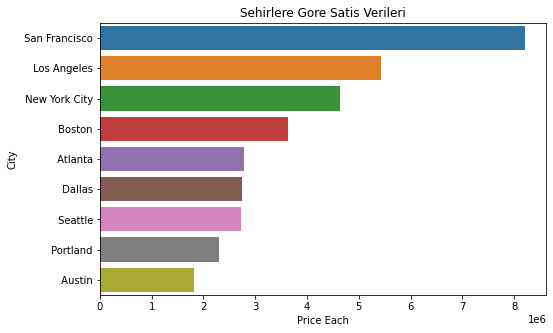

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Price Each',y ='City',data = city)
plt.title('Sehirlere Gore Satis Verileri')

**c. Müşterilerin ürünleri satın alma olasılığını en üst düzeye çıkarmak için görüntülü reklamcılık için en uygun zaman dilimine karar verin**

In [ ]:
list_time = []
for time in data['Order Date']:
  list_time.append(str(time).split(' ')[1].split(':')[0])
data['Time'] = list_time
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Time
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january,Boston,21
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january,Portland,14
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",january,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",january,Los Angeles,20
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",january,Austin,11
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",december,San Francisco,20
25113,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",december,Los Angeles,12
25114,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",december,Seattle,06
25115,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",december,Dallas,10


In [ ]:
time = data.groupby(['Time'])['Quantity Ordered'].sum().sort_values(ascending = False)
time = time.to_frame()
time

,Quantity Ordered
Time,
19,14470.0
12,14202.0
11,14005.0
18,13802.0
20,13768.0
13,13685.0
14,12362.0
10,12308.0
21,12244.0


Text(0.5, 1.0, 'Saatlere Gore Satis Verileri')

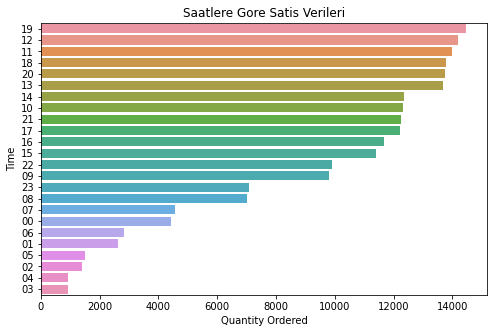

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x = 'Quantity Ordered',y ='Time',data = time)
plt.title('Saatlere Gore Satis Verileri')

**d.En çok hangi ürünler sattı?**

In [ ]:
product = data.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending = False)
product = product.to_frame()
product

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017.0
AA Batteries (4-pack),27635.0
USB-C Charging Cable,23975.0
Lightning Charging Cable,23217.0
Wired Headphones,20557.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
27in FHD Monitor,7550.0
iPhone,6849.0


<function matplotlib.pyplot.show>

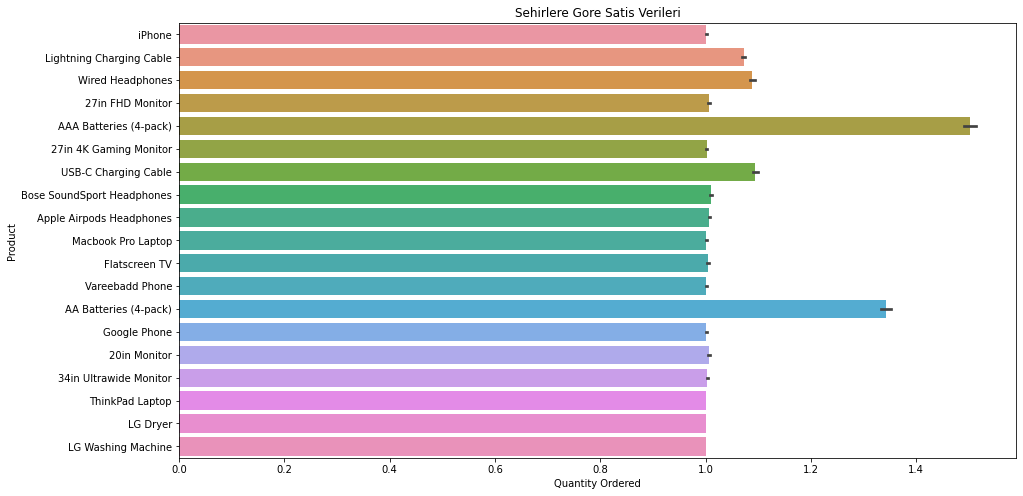

In [ ]:
fig = plt.figure(figsize = (15,8))
sns.barplot(x = 'Quantity Ordered',y ='Product',data = data)
plt.title('Sehirlere Gore Satis Verileri')